### Importing Libraries

In [3]:
# EDA Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pprint import pprint
%matplotlib inline
warnings.filterwarnings('ignore')

# Models and Algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.cluster import KMeans 
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


# Feature Engineering and Data Processing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline, make_union

In [4]:
# Loading the data
train = pd.read_csv('/kaggle/input/hackathon/Train.csv')
test = pd.read_csv('/kaggle/input/hackathon/Test.csv')
train.head(10)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.0000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.0000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.2820,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.0000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.0000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
5,Apcnt_1000020,3724.0,NaN,0.0000,0.0,0.0000,192944.0,9244585.0,6761209.0,67963357.0,...,0.030558,12.12,0.382960,NaN,0.0,lending,NaN,0.000000,NaN,no
6,Apcnt_1000024,3350.0,0.24205,0.3132,0.0,2.8188,NaN,580388.0,NaN,96472.0,...,0.660000,1.01,0.513504,NaN,0.0,charge,NaN,2.146512,0.004390,yes
7,Apcnt_1000028,3416.0,0.87020,0.0570,0.0,0.0000,17505.0,186331.0,186331.0,1484813.0,...,0.137500,3.03,0.635960,NaN,0.0,charge,155.295994,0.946074,0.128389,no
8,Apcnt_1000036,3376.0,0.29180,0.5586,0.0,0.0000,18283.0,1105149.0,18283.0,115533.0,...,0.471427,4.04,0.410880,0.0,0.0,charge,NaN,0.641601,0.009990,no
9,Apcnt_1000040,3310.0,0.24395,0.1562,0.0,0.0000,NaN,0.0,NaN,NaN,...,0.825000,1.01,0.800000,NaN,NaN,charge,NaN,0.000000,NaN,yes


## EDA and Data Preprocessing


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [6]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [7]:
def iszero(X):
    """ This Function returns a boolean dataframe of shape X.
    All occurence of 0 are marked as True otherwise False"""
    df = X.copy()
    cols = df.columns
    for col in cols:
        df[col] = df[col].apply(lambda val: True if val ==0 else False)
    return df

nzeros = pd.DataFrame(iszero(train).sum(), columns=['zero_entries'])
nzeros.sort_values('zero_entries', ascending=False).head(10)

,zero_entries
form_field5,50322
form_field39,48194
form_field4,47900
form_field34,46890
form_field18,37265
form_field17,36859
form_field46,36730
form_field16,35943
form_field19,33598
form_field20,31471



Top 10 columns with heighest zero entries (missing values)

In [8]:
Nnulls = pd.DataFrame(train.isna().sum(), columns=['no_null_val'])
Nnulls.sort_values('no_null_val', ascending=False).head(10)

,no_null_val
form_field40,43729
form_field31,39408
form_field41,38229
form_field11,31421
form_field45,31317
form_field23,28123
form_field30,25509
form_field35,23148
form_field15,22475
form_field48,20889


Top 10 columns with null entries (missing values)

In [9]:
total = train.shape[0]
df_missing = pd.merge(nzeros,Nnulls, left_index=True, right_index=True)
df_missing['zero_per100'] = df_missing['zero_entries'].apply(lambda val: (val/total)*100)
df_missing['null_per100'] = df_missing['no_null_val'].apply(lambda val: (val/total)*100)
df_missing['total_missing %'] = df_missing['zero_per100'] + df_missing['null_per100']
df_missing['available_entries %'] = 100 - df_missing['total_missing %']
df_missing.sort_values('total_missing %', ascending=False).head(10)

,zero_entries,no_null_val,zero_per100,null_per100,total_missing %,available_entries %
form_field45,23075,31317,41.205357,55.923214,97.128571,2.871429
form_field46,36730,15904,65.589286,28.400000,93.989286,6.010714
form_field39,48194,4211,86.060714,7.519643,93.580357,6.419643
form_field35,28090,23148,50.160714,41.335714,91.496429,8.503571
form_field5,50322,355,89.860714,0.633929,90.494643,9.505357
form_field16,35943,13036,64.183929,23.278571,87.462500,12.537500
form_field4,47900,355,85.535714,0.633929,86.169643,13.830357
form_field17,36859,11151,65.819643,19.912500,85.732143,14.267857
form_field18,37265,10402,66.544643,18.575000,85.119643,14.880357
form_field34,46890,355,83.732143,0.633929,84.366071,15.633929


In [10]:
# feature with null value more than 60% or zero entries more than 85%
missing_like = df_missing[(df_missing['null_per100'] > 60) | (df_missing['zero_per100']>85)].index

### Checking for values at the edge



In [11]:
desc_df = train.describe().drop(missing_like,axis=1)
# finding the inter-quartile range for each column

intqtl_range = {col: desc_df[col].loc['75%'] - desc_df[col].loc['25%'] for col in desc_df.columns}

# Finding the upper and lower bound for each column

upper_bound = {col : desc_df[col].loc['75%'] + (intqtl_range[col]*1.5) for col in desc_df.columns}
lower_bound = {col : desc_df[col].loc['25%'] - (intqtl_range[col]*1.5) for col in desc_df.columns}

# Getting the number of instances with outliers for each column
outlier_loc = {col : train[(train[col]>upper_bound[col])|
                           (train[col]<lower_bound[col])].index for col in desc_df.columns}
outlier_count = {col : len(outlier_loc[col]) for col in outlier_loc.keys()}


#Creating a datafram for the columns with outliers

outlier = pd.DataFrame(np.array(list(outlier_count.items())),columns=['column','no_of_outliers'])
total = train.shape[0]
outlier['no_of_outliers'] = outlier['no_of_outliers'].apply(lambda val: int(val))
outlier['percentage_of_outliers'] = outlier['no_of_outliers'].apply(lambda val: (val/total)*100)
outlier.sort_values('percentage_of_outliers', ascending=False).head(20)

,column,no_of_outliers,percentage_of_outliers
30,form_field34,8755,15.633929
15,form_field18,8333,14.880357
14,form_field17,7990,14.267857
17,form_field20,7605,13.580357
41,form_field49,7289,13.016071
16,form_field19,7057,12.601786
13,form_field16,7021,12.537500
40,form_field48,5889,10.516071
2,form_field3,5844,10.435714
3,form_field6,5755,10.276786


First 20 columns with heighest outliers

In [12]:
train.default_status.value_counts(normalize=True)

no     0.755089
yes    0.244911
Name: default_status, dtype: float64

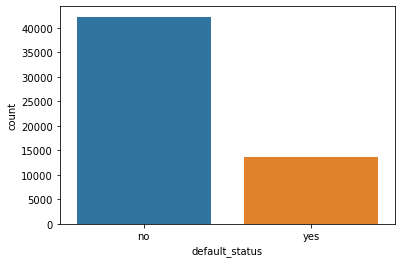

In [13]:
sns.countplot(train.default_status)

charge     36373
lending    19627
Name: form_field47, dtype: int64


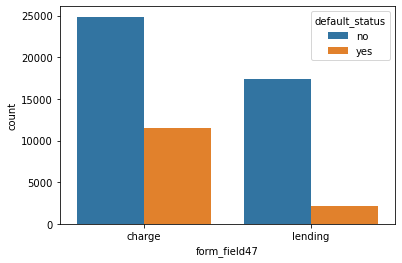

In [14]:
print(train.form_field47.value_counts())
sns.countplot(train.form_field47, hue=train.default_status)

The classification is imbalance

In [15]:
# Collecting the Training and Testing set in different variables
df_train = train.copy()
df_train['default_status'] = train['default_status'].apply(lambda val: 1 if val=='yes' else 0)

df_test = test.copy()


In [16]:
correlation_matrix = df_train.corr()
correlation_matrix

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status
form_field1,1.000000,-0.263382,-0.501989,-0.276037,-0.238508,0.413203,0.259690,0.590875,0.525935,0.407465,...,-0.204252,-0.769666,0.436825,0.020987,-0.308952,-0.332168,0.132836,-0.238500,0.119797,-0.414826
form_field2,-0.263382,1.000000,0.120889,0.089388,0.039718,-0.170318,-0.093021,-0.201365,-0.162909,-0.119794,...,0.152294,0.133388,0.017639,-0.097404,0.059398,0.103379,-0.062440,0.145432,-0.045105,0.226313
form_field3,-0.501989,0.120889,1.000000,0.376795,0.649863,-0.122285,-0.082032,-0.204138,-0.208045,-0.142977,...,0.026840,0.431644,-0.242528,-0.019430,0.268679,0.403775,-0.057103,0.195454,-0.041295,0.193603
form_field4,-0.276037,0.089388,0.376795,1.000000,0.099439,-0.068868,-0.044020,-0.113001,-0.122086,-0.072819,...,0.000609,0.217256,-0.133150,0.002108,0.134662,0.885903,-0.030856,-0.021376,-0.023217,0.147548
form_field5,-0.238508,0.039718,0.649863,0.099439,1.000000,-0.044174,-0.047210,-0.072429,-0.089868,-0.070542,...,0.033270,0.232948,-0.130958,-0.069985,0.041071,0.125941,-0.022956,0.470998,-0.016133,0.088912
form_field6,0.413203,-0.170318,-0.122285,-0.068868,-0.044174,1.000000,0.188560,0.491946,0.256348,0.230088,...,-0.110028,-0.202840,-0.055535,0.154622,-0.076431,-0.065658,0.051453,-0.235662,0.075432,-0.165438
form_field7,0.259690,-0.093021,-0.082032,-0.044020,-0.047210,0.188560,1.000000,0.340538,0.271203,0.899833,...,-0.191399,-0.175587,0.108372,0.035129,-0.028506,-0.063864,0.082574,-0.081224,0.063129,-0.113481
form_field8,0.590875,-0.201365,-0.204138,-0.113001,-0.072429,0.491946,0.340538,1.000000,0.583663,0.448022,...,-0.158906,-0.357423,0.180179,0.091302,-0.123355,-0.112679,0.138933,-0.238004,0.139536,-0.227655
form_field9,0.525935,-0.162909,-0.208045,-0.122086,-0.089868,0.256348,0.271203,0.583663,1.000000,0.478816,...,-0.187234,-0.416071,0.461979,-0.000396,-0.120909,-0.134048,0.149994,-0.079773,0.229768,-0.206441
form_field10,0.407465,-0.119794,-0.142977,-0.072819,-0.070542,0.230088,0.899833,0.448022,0.478816,1.000000,...,-0.234042,-0.293796,0.298123,-0.009070,-0.069350,-0.103857,0.120024,-0.091290,0.102032,-0.170323


In [17]:
#column that correlate to the target
corr_col = correlation_matrix['default_status'].index

# Creating a dataframe for feature correlation to target column
index = correlation_matrix[corr_col]['default_status'].index
corr_target_df = pd.DataFrame(correlation_matrix[corr_col]['default_status'].values,
                              index=index,columns=['correlation'])
corr_target_df.sort_values('correlation', ascending=False)[:10]

,correlation
default_status,1.000000
form_field42,0.329039
form_field21,0.325634
form_field22,0.322421
form_field23,0.318622
form_field16,0.275836
form_field17,0.269507
form_field18,0.265692
form_field35,0.254479
form_field2,0.226313


10 most positively correlated features

In [18]:
corr_target_df.sort_values('correlation')[:10]

,correlation
form_field1,-0.414826
form_field8,-0.227655
form_field28,-0.220421
form_field27,-0.218191
form_field32,-0.218091
form_field26,-0.218068
form_field25,-0.215165
form_field37,-0.213527
form_field29,-0.209252
form_field9,-0.206441


10 most negatively correlated features

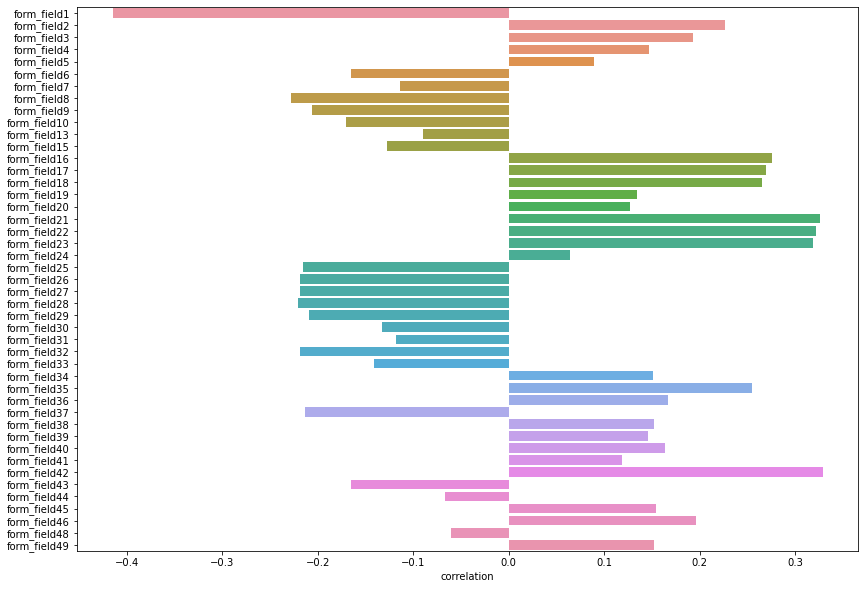

In [19]:
plt.figure(figsize=(14,10))
most_corr = corr_target_df[corr_target_df['correlation'].abs() >=0.05].drop('default_status')
sns.barplot(x=most_corr['correlation'], y=most_corr.index)

Correlation Plot of columns


## Feature Engineering


Validation

In [20]:
X = df_train.drop(['default_status','Applicant_ID'],axis=1)
X = pd.get_dummies(X,columns=['form_field47'], drop_first=True )               
y = df_train.default_status

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.095, random_state=55)

In [22]:
X_train.shape, y_train.shape

((50680, 50), (50680,))

In [23]:
cat = CatBoostClassifier(eval_metric='AUC', random_seed=42,learning_rate=0.008, iterations=4397)

In [27]:
# Intantiating a CatBoostClassifer
# The parameters were chosen after careful tuning and searching
# Searching was done with the eval_set parameter of catboost
# Missing values are handled by the model

cat = CatBoostClassifier(eval_metric='AUC', random_seed=42,learning_rate=0.008, iterations=4397)


cat.fit(X_train,y_train,verbose=200)

# collecting the validation prediction
t_pred = cat.predict_proba(X_train)[:,1]
pred = cat.predict_proba(X_test)[:,1]


print("Train Score:",roc_auc_score(y_train,t_pred))

print("Validation Score:",roc_auc_score(y_test,pred))

0:	total: 29.1ms	remaining: 2m 8s
200:	total: 6.19s	remaining: 2m 9s
400:	total: 11.8s	remaining: 1m 57s
600:	total: 17.4s	remaining: 1m 49s
800:	total: 22.9s	remaining: 1m 42s
1000:	total: 28.9s	remaining: 1m 38s
1200:	total: 34.4s	remaining: 1m 31s
1400:	total: 40s	remaining: 1m 25s
1600:	total: 45.6s	remaining: 1m 19s
1800:	total: 51.2s	remaining: 1m 13s
2000:	total: 57.1s	remaining: 1m 8s
2200:	total: 1m 3s	remaining: 1m 3s
2400:	total: 1m 8s	remaining: 57.3s
2600:	total: 1m 14s	remaining: 51.4s
2800:	total: 1m 20s	remaining: 45.7s
3000:	total: 1m 25s	remaining: 40s
3200:	total: 1m 32s	remaining: 34.4s
3400:	total: 1m 38s	remaining: 29s
3600:	total: 1m 46s	remaining: 23.4s
3800:	total: 1m 58s	remaining: 18.5s
4000:	total: 2m 9s	remaining: 12.8s
4200:	total: 2m 16s	remaining: 6.35s
4396:	total: 2m 21s	remaining: 0us
Train Score: 0.8879307969269439
Validation Score: 0.8489396802817084


In [29]:
# Instantiating a second CatBoostClassifier model with different parameters
# The parameters have been chosen after tuning and searching

cat2 = CatBoostClassifier(eval_metric='AUC', random_seed = 42, iterations=2300, learning_rate=0.007,
                          max_depth=10, min_data_in_leaf=10)


# Training the model
cat2.fit(X_train,y_train,verbose=200)

# Collecting the validation predictions
train_pred_c = cat2.predict_proba(X_train)[:,1]
val_pred_c = cat2.predict_proba(X_test)[:,1]


print('Training Score:',roc_auc_score(y_train,train_pred_c))

print("Validation Score:",roc_auc_score(y_test,val_pred_c))

0:	total: 127ms	remaining: 4m 52s
200:	total: 28.6s	remaining: 4m 58s
400:	total: 55.2s	remaining: 4m 21s
600:	total: 1m 21s	remaining: 3m 50s
800:	total: 1m 47s	remaining: 3m 21s
1000:	total: 2m 14s	remaining: 2m 55s
1200:	total: 2m 40s	remaining: 2m 27s
1400:	total: 3m 6s	remaining: 1m 59s
1600:	total: 3m 31s	remaining: 1m 32s
1800:	total: 3m 57s	remaining: 1m 5s
2000:	total: 4m 26s	remaining: 39.9s
2200:	total: 4m 51s	remaining: 13.1s
2299:	total: 5m 4s	remaining: 0us
Training Score: 0.9370361079704761
Validation Score: 0.8490745616734715


In [31]:
X_train.shape,y_train.shape

((50680, 50), (50680,))

In [33]:
# Instantiating XGBClassifier model
# The parameters have been chosen after careful tuning and searching using eval_set parameter

xg = xgb.XGBClassifier(eval_metric='auc', random_state = 42,n_estimators=2200,learning_rate=0.01,)

# Missing values are filled with -99
# The choice of handling missing values was choosing after carefull tuning and multiple trials on the model
# data is copied to avoid altering the original data

x_train = X_train.copy()
x_test = X_test.copy()
x_train[missing_like] = X_train[missing_like].fillna(-99)
x_test[missing_like] =  X_test[missing_like].fillna(-99)



# Traing the model on the -99 filled data 
xg.fit(x_train,y_train,verbose=200)

# Collecting the validation pedictions 
train_pred_x = xg.predict_proba(X_train)[:,1]
val_pred_x = xg.predict_proba(x_test)[:,1]


print("Training Score:",roc_auc_score(y_train,train_pred_x))

print("Validation Score:",roc_auc_score(y_test,val_pred_x))

Training Score: 0.9254388726687359
Validation Score: 0.8454838670457023


In [34]:
pipe = Pipeline([('impute_missing',SimpleImputer(strategy='constant', fill_value=-99)),
                 ('model', GradientBoostingClassifier(n_estimators=1000, learning_rate=0.02))])
pipe.fit(X_train,y_train)

train_pred_gb = pipe.predict_proba(X_train)[:,1]
val_pred_gb = pipe.predict_proba(X_test)[:,1]

print('Training Score:',roc_auc_score(y_train,train_pred_gb))

print("Validation Score:",roc_auc_score(y_test,val_pred_gb))

Training Score: 0.8546373007914789
Validation Score: 0.8449941146119482


In [35]:
class BestWeights():
    import numpy as np
    from sklearn.metrics import accuracy_score as mscore
    
    def __init__(self, names,weights_array=None, metric=mscore, upper_thresh=None,lower_thresh=None):
        
        """ Finds the best weights for blending to models.
            The first instance that gives the best is taken as the best
            
            weights_array (dict): dictionary of names as key and list of weights as values. The weights to be tested for 
            each name.
            
            metric (func): A metric provide to test on the weights when blending. default is Accuracy Score metric
            
            upper_thresh (dict): the upper limit (value between 0 and 1) of weights to be drawn for each names. Should only be set if weights_array
            is None. Default is 1
            
            lower_thresh(dict): the lower limit ( values between 0 and 1) of weights to be drawn for each names. Should only be if weights_array is
            None."""
        
        if weights_array == None:
            weights_array = {}
            weights = np.arange(0.01,1,0.01)
            if upper_thresh == None:
                upper_thresh = {n:1 for n in names}
            if lower_thresh == None:
                lower_thresh = {n:0 for n in names}
            for name in names:
                weights_array[name] = weights[(weights < upper_thresh[name]) & (lower_thresh[name] < weights)]
                
        self.weights_array = weights_array    
        self.metric = metric
        self.best_score_ = 0
        self.scores_ = []
        self.best_weights_ = 0
        self.all_weight_combinations_ = []
        self.pred_names = names
        self.test = None
    def fit(self,models_preds, val_test):
        """
        modela_preds (list): List of predictions of models to be blended
        """
        self.test = val_test[:]
        preds = models_preds[:]
        names = self.pred_names
        weights = list(self.weights_array.values())
        
        if len(models_preds) > len(names):
            raise ValueError('prediction_sets provided does not match names given')
        def get_combinations(weights):
            if len(weights) == 2:
                combinate = np.meshgrid(weights[0],weights[1])
                self.all_weight_combinations_ = np.array(combinate).T.reshape(-1,len(weights))
                
            elif len(weights) == 3:
                combinate = np.meshgrid(weights[0],weights[1],weights[2])
                self.all_weight_combinations_ = np.array(combinate).T.reshape(-1,len(weights))
                
            elif len(weights) == 4:
                combinate = np.meshgrid(weights[0],weights[1],weights[2],weights[3])
                self.all_weight_combinations_ = np.array(combinate).T.reshape(-1,len(weights))
            
            elif len(weights) == 5:
                combinate = np.meshgrid(weights[0],weights[1],weights[2],weights[3],weights[4])
                self.all_weight_combinations_ = np.array(combinate).T.reshape(-1,len(weights))
                
            elif len(weights) == 6:
                combinate = np.meshgrid(weights[0],weights[1],weights[2],weights[3],weights[4],weights[5])
                self.all_weight_combinations_ = np.array(combinate).T.reshape(-1,len(weights))
             
            elif len(weights) == 7:
                combinate = np.meshgrid(weights[0],weights[1],weights[2],weights[3],weights[4],weights[5],weights[6])
                self.all_weight_combinations_ = np.array(combinate).T.reshape(-1,len(weights))
             
            elif len(weights) == 8:
                combinate = np.meshgrid(weights[0],weights[1],weights[2],weights[3],weights[4],weights[5],weights[6],
                                        weights[7])
                self.all_weight_combinations_ = np.array(combinate).T.reshape(-1,len(weights))
            
            elif len(weights) == 9:
                combinate = np.meshgrid(weights[0],weights[1],weights[2],weights[3],weights[4],weights[5],weights[6],
                                        weights[7], weights[8])
                self.all_weight_combinations_ = np.array(combinate).T.reshape(-1,len(weights))
              
            elif len(weights) == 10:
                combinate = np.meshgrid(weights[0],weights[1],weights[2],weights[3],weights[4],weights[5],weights[6],
                                        weights[7], weights[8], weights[9])
                self.all_weight_combinations_ = np.array(combinate).T.reshape(-1,len(weights))
            
            else:
                raise ValueError('Can only blend in 10 or less models predictions')
                
        get_combinations(weights)
        comb_sum = self.all_weight_combinations_.sum(-1)
        combinations = self.all_weight_combinations_[comb_sum==1]
        max_score = 0
        scores = []
        for indx, comb in enumerate(combinations):
            if sum(comb) == 1:
                w = np.array(comb)
                blended = w.dot(models_preds)
                score = roc_auc_score(self.test,blended)
                scores.append(score)
                if score > max_score:  
                    max_score = score
                    best_weights = w[:]
                
        self.best_score_ = max_score
        self.scores_ = scores
        self.pred_names = names
        self.best_weights_ = best_weights
        self.named_weights = [(name,weight) for name,weight in zip(self.pred_names,self.best_weights_)]
        
        return self

In [38]:
bw = BestWeights(['cat1','cat','xgb','gb']).fit([val_pred_c,pred,val_pred_x,val_pred_gb],y_test)

In [40]:
bw.best_weights_, bw.best_score_

(array([0.57, 0.31, 0.11, 0.01]), 0.849736240388276)

In [41]:
bw.named_weights

[('cat1', 0.5700000000000001), ('cat', 0.31), ('xgb', 0.11), ('gb', 0.01)]

In [43]:
# Blending the predictions of the  four (4) fitted models 
# The weights have been chosen base on multiple trials and  which combination gave best score
blended_preds = (val_pred_c*0.57 + pred*0.31 + val_pred_x*0.11 + val_pred_gb*0.01)

print("AUC Score of the Blended Predictions ")
print("---------------------------------------\n",roc_auc_score(y_test,blended_preds))
print("---------------------------------------")
      

AUC Score of the Blended Predictions 
---------------------------------------
 0.849736240388276
---------------------------------------


### Predicting 

In [44]:
# collecting testing set passable to the models
testing_set = df_test.drop(['Applicant_ID'], axis=1)
testing_set = pd.get_dummies(testing_set,columns=['form_field47'], drop_first=True ) 

In [45]:
# Checking shape of training and test sets
X_train.shape,testing_set.shape, y_train.shape

((50680, 50), (24000, 50), (50680,))

In [46]:
# predicting with the trained models
cat_pred = cat.predict_proba(testing_set)[:,1]

cat2_pred = cat2.predict_proba(testing_set)[:,1]

#lgb_pred = lg.predict_proba(testing_set)[:,1]

# Filling missing values with -99 in the testing set before predicting with the trained XGBClassifier
test_set = testing_set.copy()
test_set[missing_like] = testing_set[missing_like].fillna(-99)

xgb_pred = xg.predict_proba(test_set)[:,1]

pred_g = pipe.predict_proba(testing_set)[:,1]

Blending predictions


In [47]:
# Blending all four predictions
# The weights are base on the best weight from the validation check
final_pred = (cat2_pred*0.57 + cat_pred*0.31 + xgb_pred*0.11 + pred_g*0.01)

Score on LB: 0.844863

In [48]:
# Submitting the predictions
submission = test.copy()
submission['default_status'] = final_pred
submission[['Applicant_ID','default_status']].to_csv('blended(cat2,cat,xgb and gb).csv', index=False)

In [49]:
# Checking the submitted file
submission[['Applicant_ID','default_status']].head(10)

,Applicant_ID,default_status
0,Apcnt_1000032,0.309716
1,Apcnt_1000048,0.391469
2,Apcnt_1000052,0.370404
3,Apcnt_1000076,0.773764
4,Apcnt_1000080,0.157610
5,Apcnt_1000084,0.348814
6,Apcnt_1000104,0.377638
7,Apcnt_1000116,0.617383
8,Apcnt_1000128,0.401346
9,Apcnt_1000156,0.302977
